## To download the profile dataset use attached link <br />
https://content.codecademy.com/PRO/paths/data-science/OKCupid-Date-A-Scientist-Starter.zip?_gl=1*1fcshk0*_ga*NzEyNTMwNzI0Ny4xNjU2MzMyNzI3*_ga_3LRZM6TM9L*MTY2MjM5OTY1MS4xMTAuMC4xNjYyMzk5NjUxLjYwLjAuMA..

In [1]:
#import necessary modules for data exploration
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
#load and explore data for understanding
df = pd.read_csv(r'C:\Users\kylew\Codecademy\profiles.csv')

In [18]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [22]:
#exploration continued
# print(df.head())
def explorer(data):
    ordinals = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'job', 'last_online', 'location', 'offspring'\
               ,'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status']
    for column in data[ordinals].select_dtypes(include='object').columns:
        print(data[column].unique())
explorer(df)

['a little extra' 'average' 'thin' 'athletic' 'fit' nan 'skinny' 'curvy'
 'full figured' 'jacked' 'rather not say' 'used up' 'overweight']
['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']
['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
['never' 'sometimes' nan 'often']
['working on college/university' 'working on space camp'
 'graduated from masters program' 'graduated from college/university'
 'working on two-year college' nan 'graduated from high school'
 'working on masters program' 'graduated from space camp'
 'college/university' 'dropped out of space camp'
 'graduated from ph.d program' 'graduated from law school'
 'working on ph.d program' 'two-year college'
 'graduated from two-year college' 'working on med school'
 'dropped out

In [52]:
#many categories have basically nan values better to be nan
df.replace(to_replace=-1, value=np.nan)
df['body_type'].replace(to_replace='rather not say', value=np.nan)
df['diet'].replace(to_replace='strictly other', value='other')
df['job'].replace(to_replace='rather not say', value=np.nan)
df['status'].replace(to_replace='unknown', value=np.nan)

#function to have location be more general
def fix_location(data):
    new_strings = []
    for string in data['location']:
        new_strings.append(string.split(', ')[1])
    data['location'] = new_strings

#function to remove mistaken characters from offspring strings
def fix_offspring(data):
    new_offspring = []
    for string in data['offspring']:
        if type(string) is str:
            new_offspring.append("'".join(string.split('&rsquo;')))
        else:
            new_offspring.append(np.nan)
    df['offspring'] = new_offspring

#same function as for offspring but for sign
def fix_sign(data):
    new_sign = []
    for string in data['sign']:
        if type(string) is str:
            new_sign.append("'".join(string.split('&rsquo;')))
        else:
            new_sign.append(np.nan)
    df['sign'] = new_sign

#only comment in the data has not yet been cleaned
# fix_location(df)
# fix_offspring(df)
# print(df['location'].unique())
# print(df['offspring'].unique())

best depth: 16


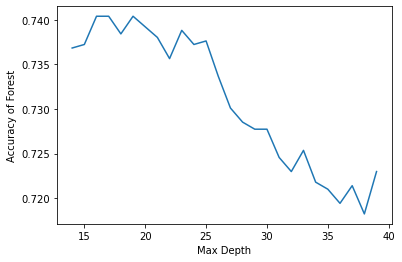

                               feature  importance
2                      body_type_curvy    0.232060
0                   body_type_athletic    0.088846
37  job_computer / hardware / software    0.061536
4               body_type_full figured    0.035993
39            job_education / academia    0.035897
..                                 ...         ...
57                location_connecticut    0.000000
61                      location_idaho    0.000000
62                    location_ireland    0.000000
71                 location_washington    0.000000
95                      status_unknown    0.000000

[96 rows x 2 columns]


<Figure size 432x288 with 0 Axes>

In [66]:
#three approaches to take, nlp from the essay statements to predict, RF for ordinals as dummies, LR for continous 
#Judging from only binary category is sex this can be used as targets
#0 for male, 1 for female
# labels = np.where(df['sex'] == 'm', 0, 1)

def random_forest(data):
    #import useful modules for random forest learning
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, precision_score
    from sklearn import tree
    
    #clean and seperate data in prep for use
    good_features = ['body_type', 'diet', 'drinks', 'drugs', 'job', 'location', 'offspring', 'orientation', 'smokes', 'status']
    new_data = data.dropna(axis=0, how='any', subset=good_features)
    y = np.where(new_data['sex'] == 'm', 0, 1)
    x = pd.get_dummies(new_data[good_features], drop_first=True)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    #initiate and train RandomForest over range of max_depth
    #self iterated by user over different ranges until best is found
    accuracy_test = []
    for i in range(14, 40):
        rf = RandomForestClassifier(max_depth=i, random_state=42)
        rf.fit(x_train, y_train)
        y_pred = rf.predict(x_test)
        accuracy_test.append(accuracy_score(y_test, y_pred))
    best_depth = 14 + np.argmax(accuracy_test)
    print(f'best depth: {best_depth}')
    
    plt.plot(range(14, 40), accuracy_test)
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy of Forest')
    plt.show()
    plt.clf()
    
    #refit with best depth and determine feature importance
    rf = RandomForestClassifier(max_depth = best_depth)
    rf.fit(x_train, y_train)
    feat_labels = x_train.columns[0:]
    importance = rf.feature_importances_
    feat_imp = pd.DataFrame(columns=['feature', 'importance'])
    feat_imp['feature'] = feat_labels
    feat_imp['importance'] = importance
    feat_imp.sort_values('importance', axis=0, ascending=False, inplace=True)
    print(feat_imp)
    
random_forest(df)